선형회귀

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

#재현성을 위해 random seed 설정
random.seed(42);
np.random.seed(42);

#데이터 준비
X=np.array([[1],[2],[3],[4],[5]])   #독립변수
y=np.array([2,4,5,4,5]);            #종속변수

#데이터 분할
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2);

#모델 생성 및 학습
model=LinearRegression();
model.fit(X_train,y_train);

#예측 및 평가
predictions=model.predict(X_test);

#결과 출력
print("학습 데이터 크기: ", X_train.shape[0]);
print("테스트 데이터 크기: ",X_test.shape[0]);
print("\n모델 계수: ");
print("기울기(slope):",model.coef_[0]);
print("절편 (intercept):", model.intercept_);
print("\n테스트 세트 실제 값:",y_test);
print("테스트 세트 예측값:", predictions);
print("\n모델 성능:");
#R² 점수 (결정계수): 모델이 실제 값을 얼마나 잘 설명하는지 나타냅니다. 1에 가까울수록 모델 성능이 좋습니다.
print("R2 점수:",r2_score(y_test,predictions));     
#평균 제곱 오차 (MSE): 모델 예측 값과 실제 값의 차이를 제곱하여 평균을 낸 값으로, 작을수록 좋은 성능을 나타냅니다.
print("평균 제곱 오차(MSE):", mean_squared_error(y_test,predictions));


학습 데이터 크기:  4
테스트 데이터 크기:  1

모델 계수: 
기울기(slope): 0.6857142857142857
절편 (intercept): 1.7714285714285714

테스트 세트 실제 값: [4]
테스트 세트 예측값: [3.14285714]

모델 성능:
R2 점수: nan
평균 제곱 오차(MSE): 0.7346938775510206


c:\aiProject2\.venv\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


데이터셋 크기: (768, 9)

처음 5개 행:
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

기술통계:
<bound method NDFrame.describe of      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0


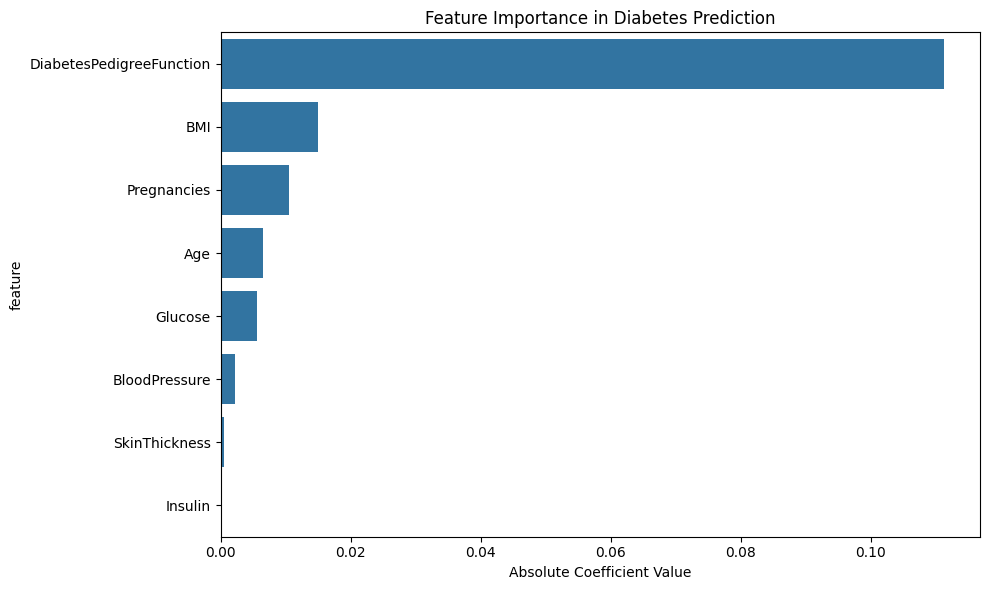

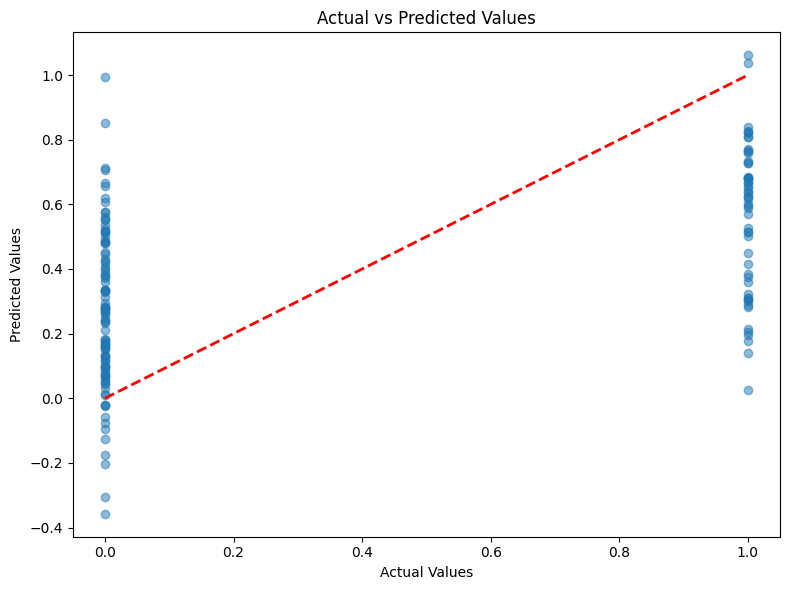

In [16]:
#어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예제
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 로드
df=pd.read_csv("dataset/diabetes.csv");

#데이터 확인
print("데이터셋 크기:", df.shape);
print("\n처음 5개 행:");
print(df.head());
print("\n기술통계:");
print(df.describe);

#독립변수(X)와 종속변수(y) 분리
X=df.drop("Outcome",axis=1);     #Outcome을 제외한 모든 특성을 독립변수로 분리
y=df["Outcome"];                 #Outcome을 종속변수

#데이터 분할
#train_data_split을 사용하여 데이터를 학습세트(80%)와 테스트 세트(20%)로 분할
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42);

#모델 생성 및 학습
#LinearRegression 모델을 생성하고, 학습 데이터를 사용하여 모델을 학습
model=LinearRegression();
model.fit(X_train,y_train);

#예측
#학습된 모델을 사용해 테스트 세트에 대해 예측을 수행

y_pred=model.predict(X_test);

#모델 평가
#r2_score, mean_squared_error, mean_absolute_error를 사용하여 모델 성능을 평가
print("\n모델 성능:");
print("R2 점수:", r2_score(y_test,y_pred));
print("평균 제곱 오차(MSE):", mean_squared_error(y_test, y_pred));
print("평균 절대 오차(MAE):", mean_absolute_error(y_test, y_pred));

#특성 중요도 분석
#model.coef_를 사용하여 특성의 중요도를 계산
#절대값을 취하여 중요한 특성 순으로 정렬
#feature_importance 데이터프레임에 특성에 중요도를 기록하고, 이를 출력
feature_importance=pd.DataFrame({
    "feature":X.columns,
    "importance":np.abs(model.coef_)
});
feature_importance=feature_importance.sort_values("importance",ascending=False);

print("\n특성 중요도:");
print(feature_importance);

#시각화: 특성 중요도
#seaborn의 barplot을 사용하여 특성의 중요도를 시각화
plt.figure(figsize=(10,6));
sns.barplot(x="importance", y="feature", data=feature_importance);
plt.title("Feature Importance in Diabetes Prediction");
plt.xlabel("Absolute Coefficient Value");
plt.tight_layout();
plt.show();

#시각화: 실제값 vs 예측값
#산점도를 사용하여 실제값과 예측값의 관계를 시각화
#빨간 실선은 완벽한 예측을 의미하는 직선
plt.figure(figsize=(8,6));
plt.scatter(y_test,y_pred, alpha=0.5);
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",lw=2);
plt.xlabel("Actual Values");
plt.ylabel("Predicted Values");
plt.title("Actual vs Predicted Values");
plt.tight_layout();
plt.show();


다중선형회귀

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

#샘플 데이터 생성
#공부 시간(X1)과 과외시간(x2)에 따른 시험 점수(Y)예측
study_hours=np.array([2,3,4,5,4,6,7,8,5,4]);                #하루 공부 시간
tutor_hours=np.array([0,1,0,2,1,3,2,3,2,1]);                #주간 과외 시간
test_scores=np.array([60,70,75,85,75,90,92,95,80,75]);      #시험 점수

#입력 데이터 형태 맞추기
#np.column_stack()을 사용하여 두 개의 독립 변수를 하나의 배열 X로 결합
X=np.column_stack((study_hours,tutor_hours));
y=test_scores;

#모델 생성 및 학습
model=LinearRegression();
model.fit(X,y);

#결과 출력
print("회귀 계수:");
#공부 시간: 공부 시간이 증가할 때 점수가 얼마나 증가하는지 보여주는 값
#공부시간 1시간 증가할때마다 증가하는 시험점수
print(f"공부 시간: {model.coef_[0]:.2f}");
#과외 시간이 1시간 증가할 때마다 증가하는 시험점수
print(f"과외 시간: {model.coef_[1]:.2f}");
#절편: 두 변수(공부 시간과 과외 시간)가 모두 0일 때 예측되는 시험 점수
print(f"절편: {model.intercept_:.2f}");

#새로운 데이터로 예측
new_student=np.array([[6,2]]);    #공부 6시간, 과외 2시간
prediction=model.predict(new_student);
print(f"\n예측 점수:{prediction[0]:.1f}");

#모델 성능 평가(R-squared)
r_squared=model.score(X,y);
print(f"R-squared: {r_squared:.4f}");


회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39

예측 점수:86.5
R-squared: 0.9613


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

회귀계수:
X1:1.7882
X2:2.9284
X3:1.5135

절편: 0.1535

R-squared 값: 0.9566
평균제곱근오차(RMSE):0.7174


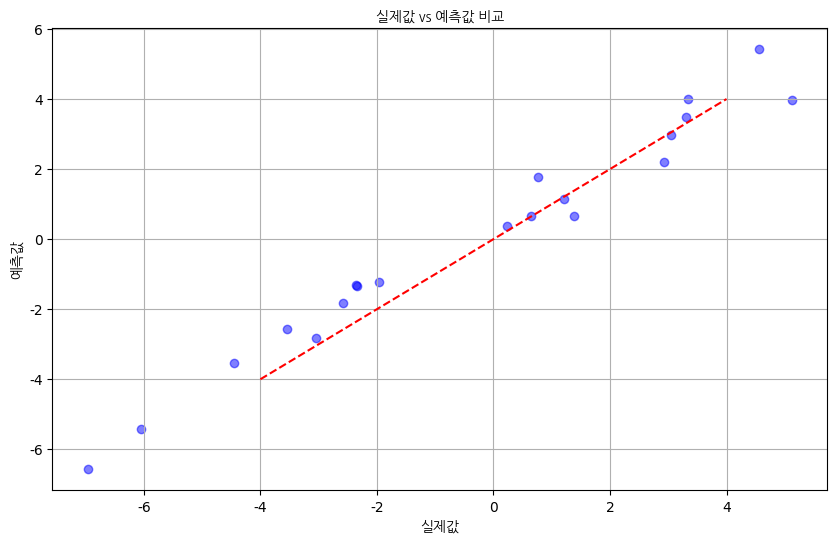


새로운 데이터 예측값:3.2192


c:\aiProject2\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#폰트 설정
font_path="./font/NanumGothic.ttf";
font=fm.FontProperties(fname=font_path).get_name();
plt.rc("font",family=font);
plt.rcParams["axes.unicode_minus"]=False            #마이너스 부호 깨짐 방지
pd.options.display.float_format="{:.2f}".format     #지수 표현식 방지
# # 폰트지정
# plt.rcParams['font.family'] = 'serif'
# # 마이너스 부호 깨짐 지정
# plt.rcParams['axes.unicode_minus'] = False

# # 숫자가 지수표현식으로 나올 때 지정
# pd.options.display.float_format = '{:.2f}'.format
#데이터 생성
np.random.seed(42);
n_samples=100;

#독립변수 생성
#X1,X2,X3은 평균=0, 표준편차=1을 가진 정규분포를 따르는 독립 변수
#np.random.normal()는 정규분포에서 샘플 생성
X1=np.random.normal(0,1,n_samples);
X2=np.random.normal(0,1,n_samples);
X3=np.random.normal(0,1,n_samples);

#종속변수 생성(Y=2X1+3X2+1.5X3+오차)
#종속변수 y는 "Y = 2*X1 + 3*X2 + 1.5*X3 + 오차"형태로 생성되며
#오차는 정규분포를 따른다.
#회귀모델을 학습하기 위한 데이터 
Y=2*X1+3*X2+1.5*X3+np.random.normal(0,1,n_samples);

#데이터 프레임생성
data=pd.DataFrame({
    "X1":X1,
    "X2":X2,
    "X3":X3,
    "Y":Y
});

#학습용과 테스트용 데이터 분리
X=data[["X1","X2","X3"]];
y=data["Y"];
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42);

#모델 학습
model=LinearRegression();
model.fit(X_train,y_train);

#예측
y_pred=model.predict(X_test);

#결과출력
#회귀계수: 각 독립변수에 대한 회귀 계수를 출력
#절편: 모델의 절편을 출력
#R-squared: r2_score를 사용하여 모델의 결정계수를 계산하여 출력
#RMSE: np.sqrt(mean_squared_error())를 사용하여 평균 제곱근 오차를 계산
#RMSE는 예측값과 실제값의 차이를 제곱한 후 평균을 구한 뒤 제곱근을 취한 값으로, 작을수록 모델이 정확하다는 의미
print("회귀계수:");
for feature,coef in zip(X.columns,model.coef_):
    print(f"{feature}:{coef:.4f}");
print(f"\n절편: {model.intercept_:.4f}");
print(f"\nR-squared 값: {r2_score(y_test,y_pred):.4f}");
print(f"평균제곱근오차(RMSE):{np.sqrt(mean_squared_error(y_test,y_pred)):.4f}");

#실제값과 예측값 비교 시각화
#실제값(y_test)과 예측값(y_pred)의 관계를 산점도로 시각화
#빨간 점선은 완벽한 예측을 나타내는 대각선
fontprop=fm.FontProperties(fname=font_path);

plt.figure(figsize=(10,6));
plt.scatter(y_test,y_pred,color="blue",alpha=0.5);
plt.plot([-4,4],[-4,4],"r--");  #대각선
plt.xlabel("실제값", fontproperties=fontprop);
plt.ylabel("예측값",fontproperties=fontprop);
plt.title("실제값 vs 예측값 비교",fontproperties=fontprop);
plt.grid(True);
plt.show();

#새로운 데이터로 예측 예시
new_data=np.array([[0.5,1.0,-0.5]]);
prediction=model.predict(new_data);
print(f"\n새로운 데이터 예측값:{prediction[0]:.4f}")

선형회귀 추가

   hour  score
0   0.5     10
1   1.2      8
2   1.8     14
3   2.4     26
4   2.6     22
[[ 0.5]
 [ 1.2]
 [ 1.8]
 [ 2.4]
 [ 2.6]
 [ 3.2]
 [ 3.9]
 [ 4.4]
 [ 4.5]
 [ 5. ]
 [ 5.3]
 [ 5.8]
 [ 6. ]
 [ 6.1]
 [ 6.2]
 [ 6.9]
 [ 7.2]
 [ 8.4]
 [ 8.6]
 [10. ]] [ 10   8  14  26  22  30  42  48  38  58  60  72  62  68  72  58  76  86
  90 100]
[  5.00336377  12.31395163  18.58016979  24.84638795  26.93512734
  33.20134551  40.51193337  45.73378184  46.77815153  52.
  55.13310908  60.35495755  62.44369694  63.48806663  64.53243633
  71.84302419  74.97613327  87.5085696   89.59730899 104.2184847 ]


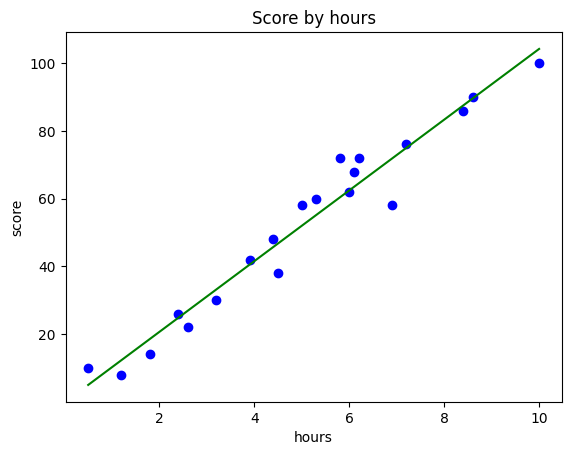

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression


dataset=pd.read_csv("./dataset/LinearRegressionData.csv");

print(dataset.head());

X=dataset.iloc[:,:-1].values;
y=dataset.iloc[:,-1].values;
print(X,y);

reg=LinearRegression();
reg.fit(X,y);

y_pred=reg.predict(X);
print(y_pred);

plt.scatter(X,y,color="blue");
plt.plot(X,y_pred,color="green");
plt.title("Score by hours");
plt.xlabel("hours");
plt.ylabel("score");
plt.show();


In [15]:
print("9시간 공부시 예상 점수:",reg.predict([[9]]));
print("기울기:",reg.coef_);
print("절편:", reg.intercept_);

9시간 공부시 예상 점수: [93.77478776]
기울기: [10.44369694]
절편: -0.218484702867201


    hour  score
0    0.5     10
1    1.2      8
2    1.8     14
3    2.4     26
4    2.6     22
5    3.2     30
6    3.9     42
7    4.4     48
8    4.5     38
9    5.0     58
10   5.3     60
11   5.8     72
12   6.0     62
13   6.1     68
14   6.2     72
15   6.9     58
16   7.2     76
17   8.4     86
18   8.6     90
19  10.0    100
[[ 0.5]
 [ 1.2]
 [ 1.8]
 [ 2.4]
 [ 2.6]
 [ 3.2]
 [ 3.9]
 [ 4.4]
 [ 4.5]
 [ 5. ]
 [ 5.3]
 [ 5.8]
 [ 6. ]
 [ 6.1]
 [ 6.2]
 [ 6.9]
 [ 7.2]
 [ 8.4]
 [ 8.6]
 [10. ]] 20
[[5.3]
 [8.4]
 [3.9]
 [6.1]
 [2.6]
 [1.8]
 [3.2]
 [6.2]
 [5. ]
 [4.4]
 [7.2]
 [5.8]
 [2.4]
 [0.5]
 [6.9]
 [6. ]] 16
[[ 8.6]
 [ 1.2]
 [10. ]
 [ 4.5]] 4
[ 10   8  14  26  22  30  42  48  38  58  60  72  62  68  72  58  76  86
  90 100] 20
[60 86 42 68 22 14 30 72 58 48 76 72 26 10 58 62] 16


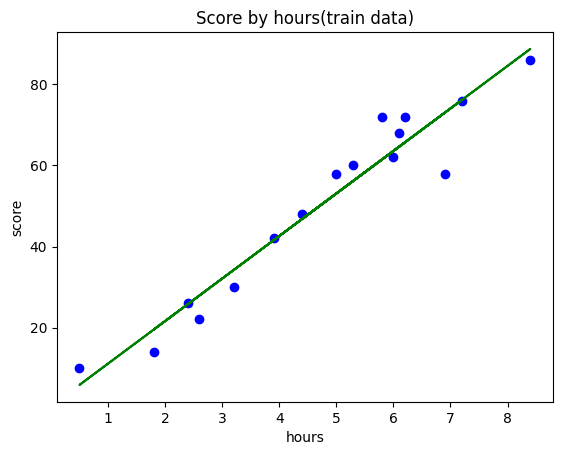

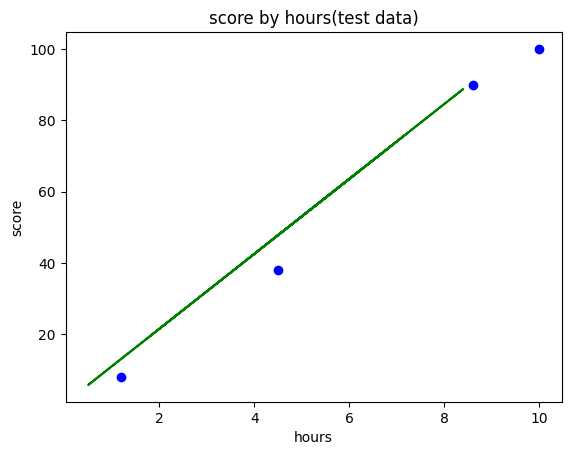

[10.49161294]
0.6115562905169369
0.9727616474310156


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


dataset=pd.read_csv("./dataset/LinearRegressionData.csv");
print(dataset);

X=dataset.iloc[:,:-1].values;
y=dataset.iloc[:,-1].values;


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0);

print(X,len(X));
print(X_train,len(X_train));
print(X_test,len(X_test));
print(y,len(y));
print(y_train,len(y_train));


reg=LinearRegression();
reg.fit(X_train,y_train);

plt.scatter(X_train,y_train,color="blue");
plt.plot(X_train,reg.predict(X_train),color="green");
plt.title("Score by hours(train data)");
plt.xlabel("hours");
plt.ylabel("score");
plt.show();


plt.scatter(X_test,y_test,color="blue");
plt.plot(X_train,reg.predict(X_train),color="green");
plt.title("score by hours(test data)");
plt.xlabel("hours");
plt.ylabel("score");
plt.show();

print(reg.coef_);
print(reg.intercept_);
print(reg.score(X_test,y_test));